In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

## Pandas

**1. Заменить в датафрейме `a` все нечетные или отрицательные числа на число `n`, а у остальных чисел в датафрейме поменять знак.**

In [ ]:
def replace_all_odd_or_negative(a, n):
    return a.apply(lambda row: row.apply(lambda x: n if 0 > x or x % 2 == 1 else -x))

In [ ]:
# Пример
a = pd.DataFrame([
    [-1, 1, 0],
    [2, -4, 6]
])
n = 100
replace_all_odd_or_negative(a, n)

,0,1,2
0,100,100,0
1,-2,100,-6


**2. Венуть копию датафрейма `a`, где индексы и названия колонок должны идти в противоположном порядке, при этом сами числовые данные должны остаться на месте.**

In [ ]:
def reverse_all_labels(a):
    b = a.copy()
    b.index = b.index[::-1]
    b.columns = b.columns[::-1]
    return b

In [ ]:
# Пример
a = pd.DataFrame({
    'A': [1, 2, 3, 4],
    'B': [5, 6, 7, 8],
    'C': [9, 10, 11, 12],
    'D': [13, 14, 15, 16]
}, index=[0, 1, 2, 3])
reverse_all_labels(a)

,D,C,B,A
3,1,5,9,13
2,2,6,10,14
1,3,7,11,15
0,4,8,12,16


**3. Вернуть серию, в которой ассоциативные метки — все названия колонок датафрейма `a`, а значения принимают значение True, если все значения в этой колонке датафрейма являются NaN-значениями, False — иначе.**

In [ ]:
def isna_columns(a):
    return a.isna().all()

In [ ]:
# Пример
a = pd.DataFrame({
    'A': [1, 2, 4],
    'B': [np.NaN, np.NaN, np.NaN],
    'C': [np.NaN, 6, np.NaN]
})
isna_columns(a)

A    False
B     True
C    False
dtype: bool

**4. Вернуть серию, где ассоциативные метки — названия колонок исходного датафрейма, а значения True, если среднее по этому столбцу строго больше медианы, иначе - False**

In [ ]:
def is_mean_greater_than_median(a):
  return a.mean() > a.median()

In [ ]:
# Пример
a = pd.DataFrame({
    'A': [100, 0, 0],
    'B': [0, 100, 100],
    'C': [1, 2, 3]
})
is_mean_greater_than_median(a)

A     True
B    False
C    False
dtype: bool

**5. Вернуть серию, в которой ассоциативные метки — названия колонок датафрейма `a`, а значения — разность максимального и минимального значения в колонке.**

In [ ]:
def column_interval_len(a):
  return a.agg(np.max) - a.agg(np.min)

In [ ]:
# Пример
a = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [0, -100, 100],
    'C': [12, 12, 12]
})
column_interval_len(a)

A      2
B    200
C      0
dtype: int64

**6. Из датафрейма `a`, который имеет двойные индексы строк и всего одну колонку, вернуть среднее по всем значениям, у которых на месте второй из вложенных меток строк стоит значение 'first'.**

In [ ]:
def count_first_mean(a):
    return np.mean([a.loc[i[0], i[1]] for i in a.index if i[1] == 'first'])

In [ ]:
# Пример
a = pd.DataFrame(
    {'col': [1, 2, 3]},
    index=pd.MultiIndex.from_tuples([
        ('A', 'first'), ('B', 'first'), ('B', 'second')
    ])
)
count_first_mean(a)

1.5

**7. Из датафрейма `a` с колонками 'gender' и 'pet', отвечающих за пол владельца домашних питомцов ('female' либо 'male') и количество домашних питомцев, которые есть у человека, вернуть среднее количество домашних животных у женщин (female), прошедших опрос.**


In [ ]:
def mean_pet_count(a):
    return a.groupby('gender').mean().loc['female', 'pet']

In [ ]:
# Пример
a = pd.DataFrame([['female', 2], ['male', 1], ['female', 2], ['male', 1]], columns=['gender', 'pet'])
mean_pet_count(a)

2.0

**8. Поместить значения из массива в промежуток от 0 до 1.**

In [ ]:
def min_max_scaler(x):
  return lambda x:(x-x.min())/(x.max()-x.min())

**9. Напишите строку кода на языке Python, которая меняет значения '1st' на 1:**

In [ ]:
df = pd.DataFrame({
    'Column1': [10, 25, 'NULL', 70, 18],
    'Column2': [0, 'NULL', 1, 0, 1],
    'Column3': ['1st', '3rd', '3rd', '2nd', '1st']})

In [ ]:
df = df.replace('1st', 1)

**Напишите строку кода на языке Python, которая меняет значения 'NULL' на NaN в колонке 'Column1':**

In [ ]:
df['Column1'] = df['Column1'].replace('NULL', np.nan)

**10. Сколько колонок останется в нашем датафрейме после выполнения следующей строки кода df.drop({'Column1','Column2'}, axis=1):**

In [ ]:
df = pd.DataFrame({
    'Column1': [10, 25, 'NULL', 70, 18],
    'Column2': [0, 'NULL', 1, 0, 1],
    'Column3': ['1st', '3rd', '3rd', '2nd', '1st']})


In [ ]:
# Количество колонок не изменится, поскольку датафрейм не был переопределен.
# Для изменения исходного датафрейма надо было выполнить следующую строку кода: df = df.drop({'Column1','Column2'}, axis=1)
3

**11. Средствами библиотеки Pandas и языка Python считайте данные из файла [titanic.csv](https://dc-edu.itmo.ru/asset-v1:ITMOUniversity+TEST2022+2022_2+type@asset+block@titanic.csv) (набор данных выживших пассажиров Титаника: класс кабины, возраст, пол, порт посадки и т.д.) и введите названия колонок (через запятую), в которых есть значения NaN:**

In [ ]:
Age

NameError: name 'Age' is not defined

**12. Средствами библиотеки Pandas и языка Python считайте данные из файла titanic.csv (набор данных выживших пассажиров Титаника: класс кабины, возраст, пол, порт посадки и т.д.) и графики**

Столбчатая диаграмма распределениа класса кабины:

In [ ]:
df['PClass'].value_counts().plot.bar()

NameError: name 'df' is not defined

Круговая диаграмма распределениа класса кабины, круговую диаграмму распределениа класса кабины:

In [ ]:
df['Age'].value_counts().plot.pie()

Гистограмма распределения возраста пассажиров:

In [ ]:
df['Age'].value_counts().plot.hist()

**13. Объединяем эти датафреймы с помощью метода .merge() по общим колонкам 'Column1', 'Column2'], присоединяя правый датафрейм к левому how='left'.**

In [ ]:
left = pd.DataFrame({
      'Column1': ['a', 'b', 'c', 'c', 'e', 'e', 'a'],
      'Column2': [3, 34, 44, 76, 77, 81, 2],
      'Column3': [True, False, False, False, True, True, False]})

right = pd.DataFrame({
      'Column1': ['d', 'b', 'c', 'c', 'f', 'a', 'a','a'],
      'Column2': [13, 21, 44, 67, 15, 87, 2, 2],
      'Column4': [3, 34, 44, 76, 77, 81, 2, 22]})


In [ ]:
df_result = left.merge(right, how = 'left', left_on='Column1', right_on='Column1')

Сколько строк в результирующем датафрейме, у которых df_result['Column1'] == 'a'?

In [ ]:
df_result[(df_result['Column1'] == 'a')] # 3

,Column1,Column2_x,Column3,Column2_y,Column4
0,a,3,True,87.0,81.0
1,a,3,True,2.0,2.0
2,a,3,True,2.0,22.0
10,a,2,False,87.0,81.0
11,a,2,False,2.0,2.0
12,a,2,False,2.0,22.0


how=inner

In [ ]:
left = pd.DataFrame({
      'key': ['a', 'b', 'c', 'd', 'e', 'e', 'a'],
      'data1': [12, 34, 44, 76, 77, 81, 2]})
right = pd.DataFrame({
       'data2': [-1, -65, - 34, -23]}, index=['d', 'b', 'c', 'a'])

In [ ]:
pd.merge(left, right, how='inner', left_on='key', right_index=True)

,key,data1,data2
0,a,12,-23
6,a,2,-23
1,b,34,-65
2,c,44,-34
3,d,76,-1


outer

In [ ]:
pd.merge(left, right, left_on='key', right_index=True, how='outer')

,key,data1,data2
0,a,12,-23.0
6,a,2,-23.0
1,b,34,-65.0
2,c,44,-34.0
3,d,76,-1.0
4,e,77,NaN
5,e,81,NaN


**14. Изменить тип данных на datetime64[ns] в датафрейме df_data:**

In [ ]:
          Date
0   01-05-2022
1   01-06-2022
2   01-07-2022
3   01-08-2022
4   01-09-2022
5   01-10-2022
6   01-11-2022
7   01-12-2022
8   01-01-2023
9   01-02-2023
10  01-03-2023
11  01-04-2023
12  01-05-2023

In [ ]:
df_data = df_data.astype({'Date': np.datetime64})

In [ ]:
df_data = df_data.astype('datetime64')

In [ ]:
df_data = df_data.astype('datetime64[ns]')

**15. Средствами библиотеки Pandas языка Python в создайте датафрейм df_all из файла daily_weather_data.csv, в котором собраны данные о погоде в столицах мира по месяцам с 2018 по 2022 год. Напишите строки кода, которые приведут к требуемым результатам. Рекомендуем выполнять данное задание по порядку.**


In [ ]:
df_all = pd.read_csv('https://dc-edu.itmo.ru/asset-v1:ITMOUniversity+TEST2022+2022_2+type@asset+block@daily_weather_data.csv',
                       delimiter=',',
                       decimal='.')

Привести значения колонки 'date' к типу datetime64[ns]:

In [ ]:
df_all = df_all.astype({'date': 'datetime64[ns]'})

Установите значения колонки 'date' в качестве индексов:

In [ ]:
df_all = df_all.set_index('date')

Оставить в датафрейме только те строки, у которых столица Sukhumi:

In [ ]:
df_all = df_all[(df_all['city'] == 'Sukhumi')]

Сгруппируйте данные по годам и выведите среднее значение средней температуры 'tavg' за каждый год в Sukhumi:

In [ ]:
df_all = df_all[['tavg']].groupby(pd.Grouper(freq='1Y')).mean()

Введите значение средней температуры за 2021 год в Sukhumi (округлите до целого):

In [ ]:
df_all[df_all.index.year == 2021]['tavg'].round()

## Регулярные выражение

**16. При помощи Python реализуйте функцию, которая находит в начале строки str год (например, 2023). На выходе должны получать значение года. Обратите внимание, что функция должна выдавать None, если строка начинается не с года (например, в "год 2023").**



In [ ]:
def re_match(str):
    result = None
    matchResult = re.match('\d{4}', str)
    if matchResult != None:
      result = matchResult.group()
    return result

**17. При помощи Python реализуйте функцию с именем re_all(str), которая находит в строке str количество вхождений годов, начинающихся с 19. Например, результатом выполнения re_all("1908, 2000, 1897,1913,2023 года") должно быть число 2 (1908, 1913):**

In [ ]:
def re_all(str):
  result = len(re.findall('19[0-9]{2}',str))
  return result

**18. При помощи Python реализуйте функцию, которая преобразует выражение "Смелый человек совершает смелые поступки. Но смелые поступки не всегда делают его героем.» так, чтобы избежать повтора слова "смелые". Вместо него подставить "такие" во втором предложении.**

In [ ]:
import re
def replace(str, word1, word2):
    result = re.sub(word2, word1, re.sub(word1, word2, str), count=1)
    return result

## BeautifulSoup

In [ ]:
from bs4 import BeautifulSoup

**19. Дан некий фрагмент HTML-документа. При помощи языка Python напишите код, который выводит все значения тега <li>**


In [ ]:
html_doc = '''<nav>
<ul>
<li><a href="/home">Home</a></li>
<li><a href="/about">About</a></li>
<li><a href="/catalog">Catalog</a></li>
<li><a href="/contact">Contact us</a></li>
</ul>
<p class="title">
<b> Title </b>
</p>
<b>Item 1</b>
<b>Item 2</b>
<b>Item 3</b>
</nav>'''

In [ ]:
from bs4 import BeautifulSoup
page = BeautifulSoup(html_doc, features='html.parser')
for tag in page.find_all('li'):
  print(tag.text)

Home
About
Catalog
Contact us


**При помощи языка Python напишите строку кода, которая выводит все теги <а>, у которых значение аттрибута href принимает значение /аbout:**

In [ ]:
page = BeautifulSoup(html_doc, features='html.parser')
page.find_all('a', {'href':'/about'})

[<a href="/about">About</a>]

**При помощи языка Python напишите строки кода, которые выводят все дочерние элементы тега `<ul>`:**




In [ ]:
html_doc = "".join(html_doc.split('\n'))
page = BeautifulSoup(html_doc, features='html.parser')
list(page.ul.children)

[<li><a href="/home">Home</a></li>,
 <li><a href="/about">About</a></li>,
 <li><a href="/catalog">Catalog</a></li>,
 <li><a href="/contact">Contact us</a></li>]


**При помощи языка Python напишите строку кода, которая выводит второй тег `<li>`методом .next_sibling**

In [ ]:
from bs4 import BeautifulSoup
html_doc = "".join(html_doc.split('\n'))
page = BeautifulSoup(html_doc, features='html.parser')
page.li.next_sibling

<li><a href="/about">About</a></li>

**При помощи языка Python напишите строку кода для получения всех тегов с помощью метода .select() (с помощью CSS селекторов), у которых аттрибут href из приведенного выше HTML-документа.**

In [ ]:
from bs4 import BeautifulSoup
html_doc = "".join(html_doc.split('\n'))
page = BeautifulSoup(html_doc, features='html.parser')
page.select('[href]')

[<a href="/home">Home</a>,
 <a href="/about">About</a>,
 <a href="/catalog">Catalog</a>,
 <a href="/contact">Contact us</a>]

**При помощи языка Python напишите функцию get_tag_by_text(page,text), которая с помощью метода next_sibling выводит тег следующий за тегом с текстом Item 1. На вход функция получает объект page конструктора BeautifulSoup (в нашем случае page = BeautifulSoup(html_doc, features='html.parser') и текст тега text (в нашем случае text = 'Item 1').**



In [ ]:
from bs4 import BeautifulSoup
html_doc = "".join(html_doc.split('\n'))
page = BeautifulSoup(html_doc, features='html.parser')
text = 'Item 1'
def get_tag_by_text(page,text):
  for tag in page.find_all():
    if tag.text == text:
      return tag.next_sibling
get_tag_by_text(page,text)

<b>Item 2</b>

**При помощи языка Python напишите строку кода для получения с помощью метода .select() (с помощью CSS селекторов) тех тегов из приведенного выше HTML-документа, имена которых НЕ `<ul>`, `<nav>`, `<li>`:**

In [ ]:
from bs4 import BeautifulSoup
html_doc = "".join(html_doc.split('\n'))
page = BeautifulSoup(html_doc, features='html.parser')
page.select('*:not(ul, nav, li)')

[<a href="/home">Home</a>,
 <a href="/about">About</a>,
 <a href="/catalog">Catalog</a>,
 <a href="/contact">Contact us</a>,
 <p class="title"><b> Title </b></p>,
 <b> Title </b>,
 <b>Item 1</b>,
 <b>Item 2</b>,
 <b>Item 3</b>]

**20. При помощи языка Python необходимо вывести список всех значений тегов в виде ['xjfdge4735202', 'Квартиры', ...]**



In [ ]:

xml = """
<?xml version="1.0" encoding="UTF-8"?>
<Ads formatVersion="3" target="Avito.ru">
    <Ad>
        <Id>xjfdge4735202</Id>
        <Category>Квартиры</Category>
        <OperationType>Продам</OperationType>
        <DateBegin>2015-11-27</DateBegin>
        <DateEnd>2079-08-28</DateEnd>
        <Description>
            Новая, просторная, светлая и уютная квартира
        </Description>
        <ManagerName>Иван Петров-Водкин</ManagerName>
        <ContactPhone>+7 916 683-78-22</ContactPhone>
        <Images>
            <Image url="http://img.test.ru/8F7B-4A4F3A0F2BA1.jpg" />
        </Images>
        <Rooms>2</Rooms>
        <Square>61</Square>
        <Floor>13</Floor>
        <Floors>16</Floors>
        <HouseType>Деревянный</HouseType>
        <MarketType>Новостройка</MarketType>
    </Ad>
    <Ad>
        <Id>xjfdge4735204</Id>
        <Category>Комнаты</Category>
        <Description>Новая, просторная, светлая и уютная квартира. </Description>
        <Price>102000</Price>
        <Rooms>2</Rooms>
        <Square>61.3</Square>
        <Floor>14</Floor>
        <Floors>16</Floors>
        <HouseType>Деревянный</HouseType>
        <OperationType>Сдам</OperationType>
    </Ad>
    <Ad>
        <Id>xjfdge4735205</Id>
        <Category>Коммерческая недвижимость</Category>
        <OperationType>Сдам</OperationType>
        <Description>Hедвижимость.</Description>
        <Price>12000</Price>
        <Square>234</Square>
    </Ad>
</Ads>
"""


In [ ]:
from bs4 import BeautifulSoup
xml_data = BeautifulSoup(xml, features='lxml')
list1 = []
for string in xml_data.stripped_strings:
  list1.append(string)

print(list1)

['xjfdge4735202', 'Квартиры', 'Продам', '2015-11-27', '2079-08-28', 'Новая, просторная, светлая и уютная квартира', 'Иван Петров-Водкин', '+7 916 683-78-22', '2', '61', '13', '16', 'Деревянный', 'Новостройка', 'xjfdge4735204', 'Комнаты', 'Новая, просторная, светлая и уютная квартира.', '102000', '2', '61.3', '14', '16', 'Деревянный', 'Сдам', 'xjfdge4735205', 'Коммерческая недвижимость', 'Сдам', 'Hедвижимость.', '12000', '234']


**При помощи языка Python напишите функцию add_tag(data,text), которая добавляет новый тег <type>Новое объявление</type> в конец приведенного выше XML-документа. На вход функция получает объект data конструктора BeautifulSoup (в нашем случае data = BeautifulSoup(xml, features='lxml')').**

In [ ]:
from bs4 import BeautifulSoup
data = BeautifulSoup(xml, features='lxml')
text = 'Новое объявление'
def add_tag(data,text):
  new = data.new_tag('type')
  new.string = text
  data.ads.append(new)
  return data

add_tag(data,text)


<?xml version="1.0" encoding="UTF-8"?><html><body><ads formatversion="3" target="Avito.ru">
<ad>
<id>xjfdge4735202</id>
<category>Квартиры</category>
<operationtype>Продам</operationtype>
<datebegin>2015-11-27</datebegin>
<dateend>2079-08-28</dateend>
<description>
            Новая, просторная, светлая и уютная квартира
        </description>
<managername>Иван Петров-Водкин</managername>
<contactphone>+7 916 683-78-22</contactphone>
<images>
<image url="http://img.test.ru/8F7B-4A4F3A0F2BA1.jpg"/>
</images>
<rooms>2</rooms>
<square>61</square>
<floor>13</floor>
<floors>16</floors>
<housetype>Деревянный</housetype>
<markettype>Новостройка</markettype>
</ad>
<ad>
<id>xjfdge4735204</id>
<category>Комнаты</category>
<description>Новая, просторная, светлая и уютная квартира. </description>
<price>102000</price>
<rooms>2</rooms>
<square>61.3</square>
<floor>14</floor>
<floors>16</floors>
<housetype>Деревянный</housetype>
<operationtype>Сдам</operationtype>
</ad>
<ad>
<id>xjfdge4735205</id>
<

**При помощи языка Python выведите значения тегов, где встречается слово квартира (Квартира, квартир и т.д). Для выполнения задания необходимо использовать регулярные выражения.**

In [ ]:
from bs4 import BeautifulSoup
import re
data = BeautifulSoup(xml, features='lxml')
for tag in data.find_all(string=re.compile('\wвартир\w*')):
  print(tag)


Квартиры

            Новая, просторная, светлая и уютная квартира
        
Новая, просторная, светлая и уютная квартира. 


**21. Дан HTML-документ, в котором содержится информация о новинках за определенный период. С помощью языка Python cформируйте список всех названий фильмов из файла, используя соответсвующие теги и аттрибуты. Результирующий список должен содержать только названия фильмов.**

In [ ]:
from bs4 import BeautifulSoup
import re
with open('/content/kinopoisk.html') as f:
  contents = f.read()
  page = BeautifulSoup(contents, 'html.parser')
  movies_div = page.find_all('div', {'class': 'name'})
  movies = []
  for tag in movies_div:
    movie = tag.find('a').text
    movie = re.sub(' \(\d{4}\)$', '', movie)
    movies.append(movie)
  print(movies)


['О чем говорят мужчины. Простые удовольствия', 'Беспринципные в деревне', 'Нюрнберг', 'Сто лет тому вперёд', 'Самая большая луна', 'Вызов']


## JSON

**Дан фрагмент JSON файла. С помощью языка Python выведите список жанров фильма (['мультфильм', 'комедия', 'приключения']):**

In [ ]:
data = '''{"kinopoiskId":1114973,
"nameRu":"Большое путешествие",
"nameEn":"",
"year":2019,
"posterUrl":"https://kinopoiskapiunofficial.tech/images/posters/kp/1114973.jpg",
"posterUrlPreview":"https://kinopoiskapiunofficial.tech/images/posters/kp_small/1114973.jpg",
"countries":[{"country":"Россия"},{"country":"США"}],
"genres":[{"genre":"мультфильм"},{"genre":"комедия"},{"genre":"приключения"}],
"duration":80,
"premiereRu":"2022-08-04"}'''

In [ ]:
import json
data = """{"kinopoiskId":1114973,"nameRu":"Большое путешествие",
        "nameEn":"","year":2019,"posterUrl":"https://kinopoiskapiunofficial.tech/images/posters/kp/1114973.jpg",
        "posterUrlPreview":"https://kinopoiskapiunofficial.tech/images/posters/kp_small/1114973.jpg","countries":[{"country":"Россия"},{"country":"США"}],"genres":[{"genre":"мультфильм"},{"genre":"комедия"},{"genre":"приключения"}],"duration":80,"premiereRu":"2022-08-04"}"""
data_json = json.loads(data)
result = [v for g in data_json['genres'] for k, v in g.items()]
print(result)

['мультфильм', 'комедия', 'приключения']


**С помощью языка Python реализуйте функцию new_name(data), которая при трансформации данного JSON файла в объект Python присвоит значение "The Big Trip" ключу "nameEn" (эту функцию можно использовать в качестве параметра object_hook метода .loads()):**

In [ ]:
import json
def new_name(data):
  data["nameEn"] = "The Big Trip"
  return data

json.loads(data, object_hook = lambda dict: new_name(dict))

**С помощью языка Python прочитайте данный файл, предварительно загрузив его во временное хранилище Google Colab или на Google disk), выведите список продолжительности каждого фильма (ключ duration) через запятую (например, 102, 120, 90):**

In [ ]:
with open("/content/kinopoisk_example.json") as file:  # сразу читаем файл и преобразуем в объект Phython
  data_json = json.load(file)
list1 = []
for film in data_json['items']:
  list1.append(film['duration'])
print(list1)

[80, 101, 82, 112, 92, 80, 103, 93, 114, 90, 107, 86, 90, 99, 97, 98, 100, 89, 105, 90, 160, 41, 103, 103, 126, 85, 143, 90, 106, 86, 117, 85, 76, 122, 100, 119, 47, 32, 140, 95, 122, 93, 90, 102, 75, 96, 89, 106, 85, 85, 86, None, 183]


## Requests

# Новый раздел

In [ ]:
import requests

**С помощью языка Python отправьте запрос на получение информации с https://api.openrouteservice.org/v2/directions/ и введите полученный код ответа:**

In [ ]:
url = 'https://api.openrouteservice.org/v2/directions/'
data = requests.get(url)
data.status_code


401

**Информацию о рейтингах фильмов в формате XML можно получить в том числе и через сервис https://rating.kinopoisk.ru/ID.xml (на место "ID" необходимо подставить ID фильма).
С помощью языка Python отправьте GET запрос на указанный сервис для фильма с ID = 1411988. В ответе введите значение заголовка "Content-Encoding", полученного в ответном запросе:**

In [ ]:
url = 'https://rating.kinopoisk.ru/1411988.xml'
data = requests.get(url)
data.headers["Content-Encoding"]

'gzip'

**С помощью языка Python отправьте GET запрос на сервис https://rating.kinopoisk.ru/ID.xml для фильма с ID = 1411988. Отобразите значение рейтинга для данного фильма https://www.kinopoisk.ru/ (тег `<kp_rating>`):**

In [ ]:
url = 'https://rating.kinopoisk.ru/1411988.xml'
data = requests.get(url)
data.text
page = BeautifulSoup(data.content, features='lxml')
page.find('kp_rating').text

<ipython-input-159-3ee1b8527ba6>:4: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  page = BeautifulSoup(data.content, features='lxml')


'6.039'

**Основные API для GitHub перечислены [здесь](https://api.github.com/). Найдите API для получения информации о пользователе (user_url) по его логину. С помощью языка Python отправьте запрос на получение информации для пользователя "itmo". Введите страну регистрации данного пользователя из полученного ответа ("location"):**

In [ ]:
data = requests.get('https://api.github.com')
url = data.json()["user_url"]
url = url.replace('{user}', 'itmo')
data = requests.get(url)
data.json()["location"]

'finland'

In [ ]:
data = requests.get('https://www.cbr-xml-daily.ru/daily_json.js')
len(data.json()['Valute'])

43

**С помощью языка Python получите данные о текущих курсах валют ЦБ РФ (https://www.cbr-xml-daily.ru/daily_json.js) и найдите наименьшее значение "Value". Обязательно надо учитывать значение поля "Nominal" (для какого количества единиц указан курс) для каждой валюты. Числовой код валюты ("NumCode") с наименьшим курсом введите в качестве ответа (в том виде, как в полученном ответном запросе):**

In [ ]:
response = requests.get('https://www.cbr-xml-daily.ru/daily_json.js')
data = response.json()
valutes = data["Valute"]
values = []

for valute in data["Valute"]:
  nominal = valutes[valute]["Nominal"]
  value = valutes[valute]["Value"]
  numcode = valutes[valute]["NumCode"]
  if nominal != 1:
    value = value/nominal
  values.append({"NumCode": numcode, "Value": value})

data1 = sorted(values, key=lambda k: k['Value'])
print(data1[0]['NumCode'])

704


**С помощью языка Python получите данные о текущих курсах валют ЦБ РФ (https://www.cbr-xml-daily.ru/daily_json.js). Отсортируйте список валют в обратном алфавитном порядке (ключ "CharCode"), введите значение CharCode из такого списка для индекса 22:**

In [ ]:
response = requests.get('https://www.cbr-xml-daily.ru/daily_json.js')
data = response.json()
# valutes = sorted(data["Valute"], charCode)
data = sorted(valutes, reverse=True)
data[22]

'JPY'

# Анализ и преобразование данных

**В [файле](https://dc-edu.itmo.ru/assets/courseware/v1/4ffb888298ea6314131a6baeb5498423/asset-v1:ITMO+DA+2024+type@asset+block/task1_3.csv) содержатся сведения о том, какие вакцинации были сделаны животному. Структура файла – чип животного (CHIP) и код вакцины (VACCINATION_CODE). Код вакцины, состоит из набора букв, соответствующих заболеваниям, от которых делается данная прививка (D - чума, P - парвовирусный энтерит, Pi - парагрипп, R – бешенство).**

In [ ]:
df = pd.read_csv('https://dc-edu.itmo.ru/assets/courseware/v1/4ffb888298ea6314131a6baeb5498423/asset-v1:ITMO+DA+2024+type@asset+block/task1_3.csv')
df

,CHIP,VACCINATION_CODE
0,643098123500501,DHPPi
1,643098123500501,R
2,643098162337594,DHPPi-L
3,643090025610457,DHPPi-LR
4,643090025610457,R
...,...,...
361,643098146919038,R
362,643096526249062,R
363,643096550988247,DHPС-LR
364,643098176354430,R


In [ ]:
df[df["VACCINATION_CODE"].str.contains('D|R|Pi')].shape[0]

334

**Сколько было сделано прививок, в которых одновременно присутствовали вакцины от парвовирусного энтерита и парагриппа (P,Pi)?**

In [ ]:
df[df["VACCINATION_CODE"].str.contains('P') & df["VACCINATION_CODE"].str.contains('Pi')].shape[0]

151

# Визуализация данных

При помощи библиотеки pandas импортируйте [набор данных об автомобилях](https://dc-edu.itmo.ru/assets/courseware/v1/b6cb4ea6a069a5a588596dd9e12de293/asset-v1:ITMO+DA+2024+type@asset+block/auto-mpg-quiz.csv) в формате CSV. Колонка 'name' должна быть использована в качестве индекса. Десятичный разделитель — точка, разделитель колонок — запятая.

Отсортируйте данные по возрастанию мощности автомобилей (колонка ) и постройте график зависимости ускорения от мощности (accel от hp). Какая команда позволит это сделать?

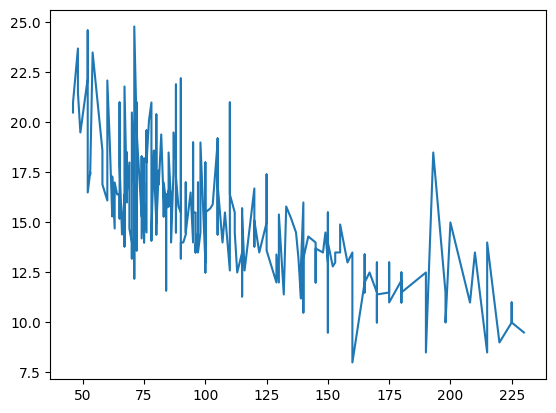

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

all_cars = pd.read_csv('https://dc-edu.itmo.ru/assets/courseware/v1/b6cb4ea6a069a5a588596dd9e12de293/asset-v1:ITMO+DA+2024+type@asset+block/auto-mpg-quiz.csv',
                       delimiter=',',
                       decimal='.',
                       index_col = 'name')

all_cars_sorted = all_cars.sort_values(by=['hp'])

plt.plot('hp', 'accel', data=all_cars_sorted)
plt.show()

(array([ 27.,  95., 120.,  44.,  19.,  47.,  13.,  14.,   5.,   8.]),
 array([ 46. ,  64.4,  82.8, 101.2, 119.6, 138. , 156.4, 174.8, 193.2,
        211.6, 230. ]),
 <BarContainer object of 10 artists>)

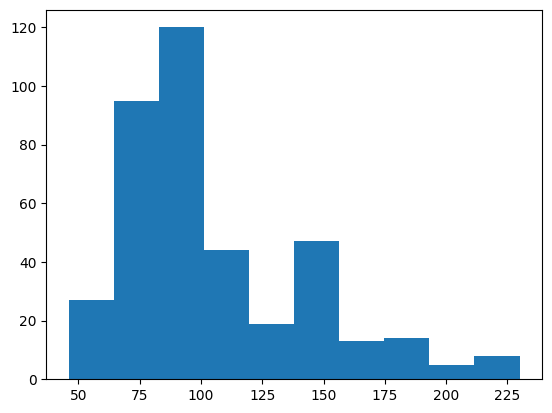

In [ ]:
plt.hist('hp', data=all_cars)

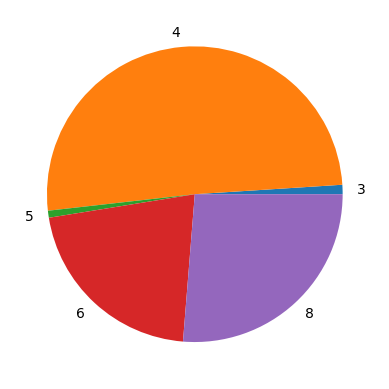

In [ ]:
data = all_cars.groupby('cyl').count()
plt.pie(data['mpg'], labels=data.index)
plt.show()

In [ ]:
data = pd.read_excel('/content/var.xlsx')
data.dropna()

,Choice_1,Choice_2,Choice_3,Choice_4,Choice_5,Choice_6,Choice_7,Choice_8,Choice_9
11,Визуализация данных,Электронные таблицы,Big Data,Анализ текстов,Обработка изображений,Машинное обучение,Python,Методы искусственного интеллекта,Статистика
39,Визуализация данных,Статистика,Методы искусственного интеллекта,Обработка изображений,Анализ текстов,Big Data,Электронные таблицы,Python,Машинное обучение
54,Методы искусственного интеллекта,Электронные таблицы,Визуализация данных,Big Data,Машинное обучение,Python,Статистика,Обработка изображений,Анализ текстов
74,Электронные таблицы,Анализ текстов,Обработка изображений,Методы искусственного интеллекта,Статистика,Python,Машинное обучение,Big Data,Визуализация данных
77,Python,Анализ текстов,Обработка изображений,Методы искусственного интеллекта,Статистика,Машинное обучение,Big Data,Визуализация данных,Электронные таблицы
107,Python,Обработка изображений,Статистика,Методы искусственного интеллекта,Электронные таблицы,Анализ текстов,Визуализация данных,Big Data,Машинное обучение
113,Анализ текстов,Машинное обучение,Big Data,Python,Электронные таблицы,Визуализация данных,Статистика,Методы искусственного интеллекта,Обработка изображений
143,Визуализация данных,Машинное обучение,Python,Статистика,Методы искусственного интеллекта,Обработка изображений,Анализ текстов,Big Data,Электронные таблицы
144,Визуализация данных,Анализ текстов,Машинное обучение,Big Data,Статистика,Методы искусственного интеллекта,Обработка изображений,Электронные таблицы,Python
146,Статистика,Анализ текстов,Обработка изображений,Электронные таблицы,Визуализация данных,Big Data,Машинное обучение,Python,Методы искусственного интеллекта


<Axes: xlabel='Choice_1'>

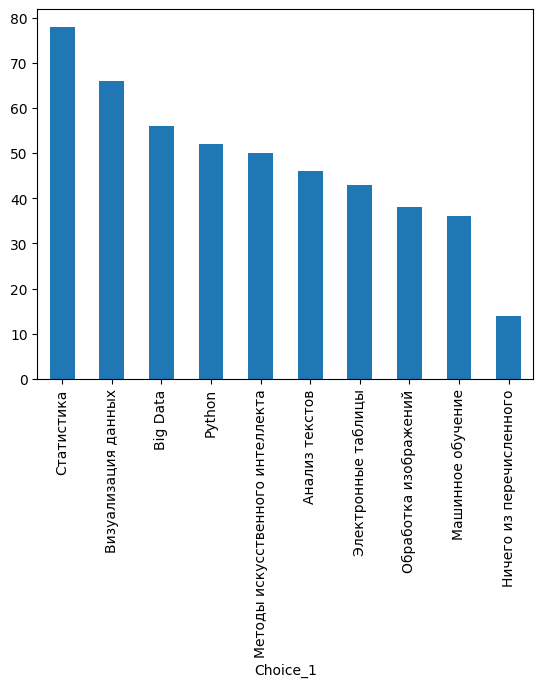

In [ ]:
data['Choice_1'].value_counts().plot.bar()
# plt.bar(data.index, data['Choice_1'])

In [ ]:
choise1 = data['Choice_1'].value_counts()
choise1

Choice_1
Статистика                          78
Визуализация данных                 66
Big Data                            56
Python                              52
Методы искусственного интеллекта    50
Анализ текстов                      46
Электронные таблицы                 43
Обработка изображений               38
Машинное обучение                   36
Ничего из перечисленного            14
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x799aba62e4d0>,
 [Text(0.959172222997593, 0.5385059392707344, 'Статистика'),
  Text(0.12597695236268364, 1.0927624661715878, 'Визуализация данных'),
  Text(-0.6962629323399375, 0.8515972810251287, 'Big Data'),
  Text(-1.082797808731175, 0.1937753993853873, 'Python'),
  Text(-0.9695815018373312, -0.5195302794783625, 'Методы искусственного интеллекта'),
  Text(-0.47773637984290046, -0.9908420415861452, 'Анализ текстов'),
  Text(0.1474522877512574, -1.0900723933927143, 'Электронные таблицы'),
  Text(0.6793732204384239, -0.865131219729773, 'Обработка изображений'),
  Text(1.0045083503031766, -0.44828894049618356, 'Машинное обучение'),
  Text(1.095366142913648, -0.10086135512909608, 'Ничего из перечисленного')],
 [Text(0.5231848489077779, 0.2937305123294915, '16.3%'),
  Text(0.06871470128873652, 0.5960522542754114, '13.8%'),
  Text(-0.3797797812763295, 0.4645076078318883, '11.7%'),
  Text(-0.5906169865806408, 0.10569567239202941, '10.9%'),
  Text(-0.528862637

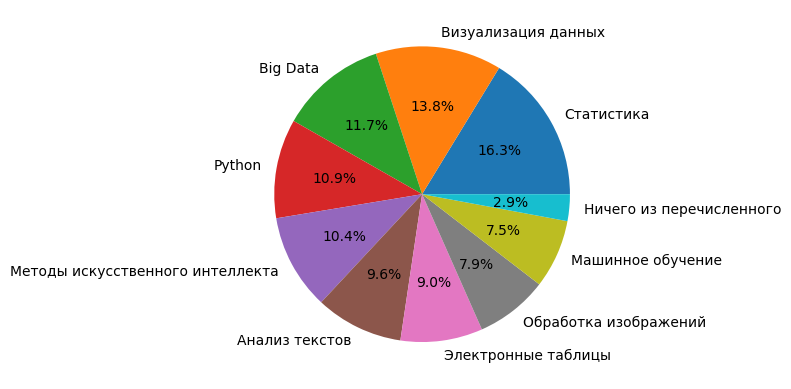

In [ ]:
plt.pie(choise1, labels=choise1.index, autopct='%1.1f%%') # средствами matplotlib
# choise1.plot.pie()

**График Японские свечи**

In [ ]:
df = pd.read_csv('https://dc-edu.itmo.ru/assets/courseware/v1/824fccdb3e15cab129049a536ece5500/asset-v1:ITMO+DA+2024+type@asset+block/SPFB.RTS-12.18_180901_181231.csv')

In [ ]:
df = df[df['<DATE>'] == '11/09/18']
df.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
1942,SPFB.RTS-12.18,1,11/09/18,10:01,103300.0,104000.0,103300.0,103730.0,159
1943,SPFB.RTS-12.18,1,11/09/18,10:02,103740.0,103900.0,103740.0,103820.0,137
1944,SPFB.RTS-12.18,1,11/09/18,10:03,103850.0,103960.0,103850.0,103960.0,38
1945,SPFB.RTS-12.18,1,11/09/18,10:04,103920.0,103920.0,103780.0,103800.0,70
1946,SPFB.RTS-12.18,1,11/09/18,10:05,103790.0,103860.0,103790.0,103860.0,8


In [ ]:
df.columns = df.columns.str.strip('<>')
df['DATETIME'] = pd.to_datetime(df['DATE'] + ' ' + df['TIME'], format='%d/%m/%y %H:%M')

new_df = df.copy().drop(['DATE', 'TIME'], axis=1)
new_df = new_df.set_index('DATETIME')
new_df_resampled = new_df.resample('H').agg({'OPEN': 'first', 'CLOSE': 'last', 'HIGH': 'max', 'LOW': 'min', 'VOL': 'sum'})
new_df_resampled


,OPEN,CLOSE,HIGH,LOW,VOL
DATETIME,,,,,
2018-09-11 10:00:00,103300.0,104170.0,104430.0,103300.0,2049
2018-09-11 11:00:00,104250.0,104330.0,104700.0,104210.0,1434
2018-09-11 12:00:00,104340.0,103630.0,104360.0,103510.0,898
2018-09-11 13:00:00,103660.0,103800.0,103970.0,103640.0,189
2018-09-11 14:00:00,103840.0,103360.0,103840.0,103240.0,428
2018-09-11 15:00:00,103320.0,103260.0,103500.0,103040.0,762
2018-09-11 16:00:00,103280.0,103570.0,103720.0,103120.0,1051
2018-09-11 17:00:00,103600.0,104050.0,104230.0,103600.0,764
2018-09-11 18:00:00,104150.0,104440.0,104450.0,104130.0,513


In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(data=go.Candlestick(
      x=new_df_resampled.index,
      open=new_df_resampled['OPEN'],
      close=new_df_resampled['CLOSE'],
      high=new_df_resampled['HIGH'],
      low=new_df_resampled['LOW'],
    ))

fig.update_layout(title='Японские свечи', xaxis_title='Часы', yaxis_title='Цена')
fig.show()

**Дан временной ряд. Постройте на его основе сглаженные ряды методом скользящего среднего (SMA offline) с указанной далее шириной окна. На основе полученных значений нарисуйте линейные графики.**

**Используется метод SMA offline с шириной окна равной трем.
Какое сглаженное значение будет соответствовать пятому элементу исходного ряда?**

In [ ]:
arr = [34, 32, 37, 33, 38, 35, 39, 34, 39, 35, 37, 32, 35, 37, 39, 36, 43, 34, 32, 36, 37, 35]

In [ ]:
df = pd.DataFrame(arr, columns=['name'], index=np.arange(1, 23))
df

,name
1,34
2,32
3,37
4,33
5,38
6,35
7,39
8,34
9,39
10,35


<Axes: >

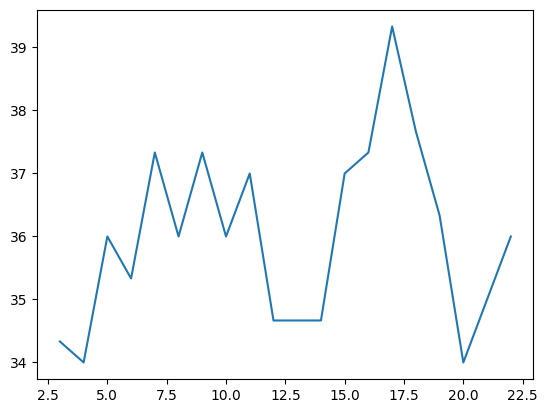

In [ ]:
df['name'].rolling(3).mean().plot()


<Axes: >

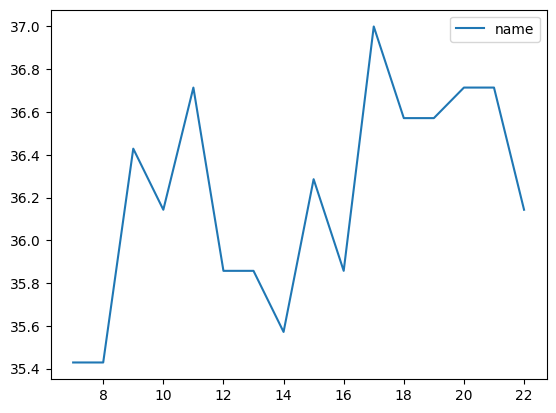

In [ ]:
df.rolling(7).mean().plot()

In [ ]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

<Axes: >

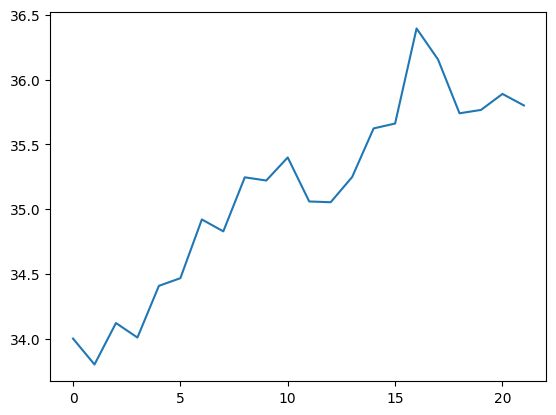

In [ ]:
exp_smooth = exponential_smoothing(arr, 0.1)
pd.DataFrame(exp_smooth, columns=['name'])['name'].plot()

Задан временной ряд  из  элементов (см. файл). Ряд содержит шумы. Проведите экспоненциальное сглаживание временного ряда. При сглаживании используйте коэффициент сглаживания.

Постройте линейный тренд для этого же исходного временного ряда.

Определите, насколько хорошо линейный тренд аппроксимирует значения временного ряда.

Определите коэффициент  линейного тренда, задаваемого уравнением вида: y = a * x + b

In [ ]:
ds = pd.read_csv('https://dc-edu.itmo.ru/assets/courseware/v1/a148bf1493b6b8991a50d1460ce585bb/asset-v1:ITMO+DA+2024+type@asset+block/task5_364950.csv')
ds.index += 1
ds

,y
1,11
2,23
3,26
4,17
5,39
...,...
96,126
97,138
98,130
99,150


In [ ]:
ds['y_exp_norm'] = ds['y'].ewm(alpha=0.24, adjust=False).mean()
ds.loc[[100]]

,y,y_exp_norm
100,148,137.826509


In [ ]:
ds['y_exp_norm_user'] = exponential_smoothing(ds['y'].to_list(), 0.24)
ds

,y,y_exp_norm,y_exp_norm_user
1,11,11.000000,11.000000
2,23,13.880000,13.880000
3,26,16.788800,16.788800
4,17,16.839488,16.839488
5,39,22.158011,22.158011
...,...,...,...
96,126,127.049577,127.049577
97,138,129.677679,129.677679
98,130,129.755036,129.755036
99,150,134.613827,134.613827


In [ ]:
x = np.array(ds.index)
y = np.array(ds.y)
poly = np.polyfit(x, y, 1)
a = poly[0]
print(a)
b = poly[1]
ds['lin_trend'] = a * x + b
ds

1.2593279327932794


,y,y_exp_norm,y_exp_norm_user,lin_trend
1,11,11.000000,11.000000,15.573267
2,23,13.880000,13.880000,16.832595
3,26,16.788800,16.788800,18.091923
4,17,16.839488,16.839488,19.351251
5,39,22.158011,22.158011,20.610579
...,...,...,...,...
96,126,127.049577,127.049577,135.209421
97,138,129.677679,129.677679,136.468749
98,130,129.755036,129.755036,137.728077
99,150,134.613827,134.613827,138.987405


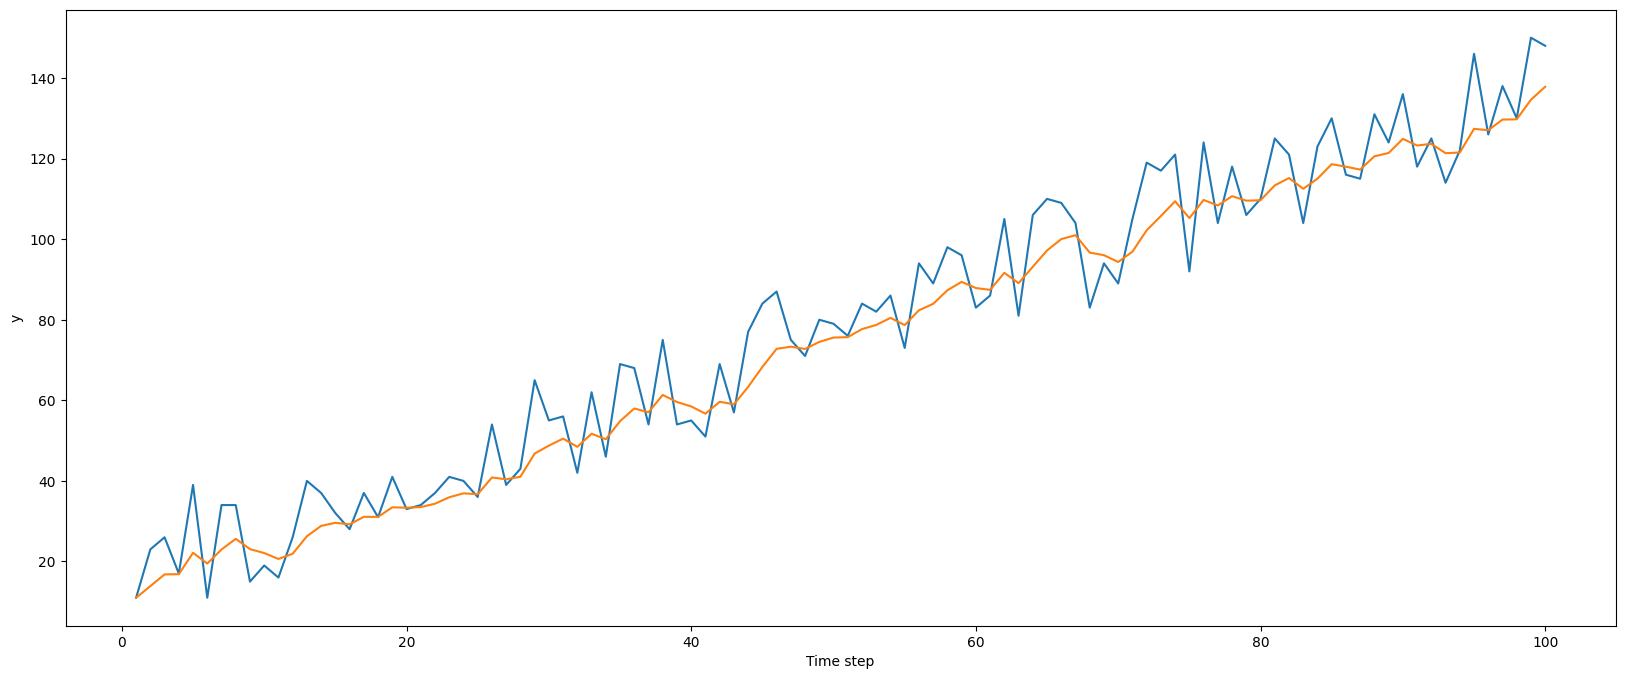

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot('y', data=ds)
plt.plot('y_exp_norm', data=ds)
plt.xlabel('Time step')
plt.ylabel('y')
plt.show()

Вычислим коэффициент детерминации

In [ ]:
f_i = ds['lin_trend']
y_avg = ds['y'].mean()
R2 = 1 - ((y - f_i) ** 2).sum() / ((y - y_avg) ** 2).sum()
round(R2, 2)

0.94

In [ ]:
y_101 = a * 101 + b
y_101

141.50606060606063